In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


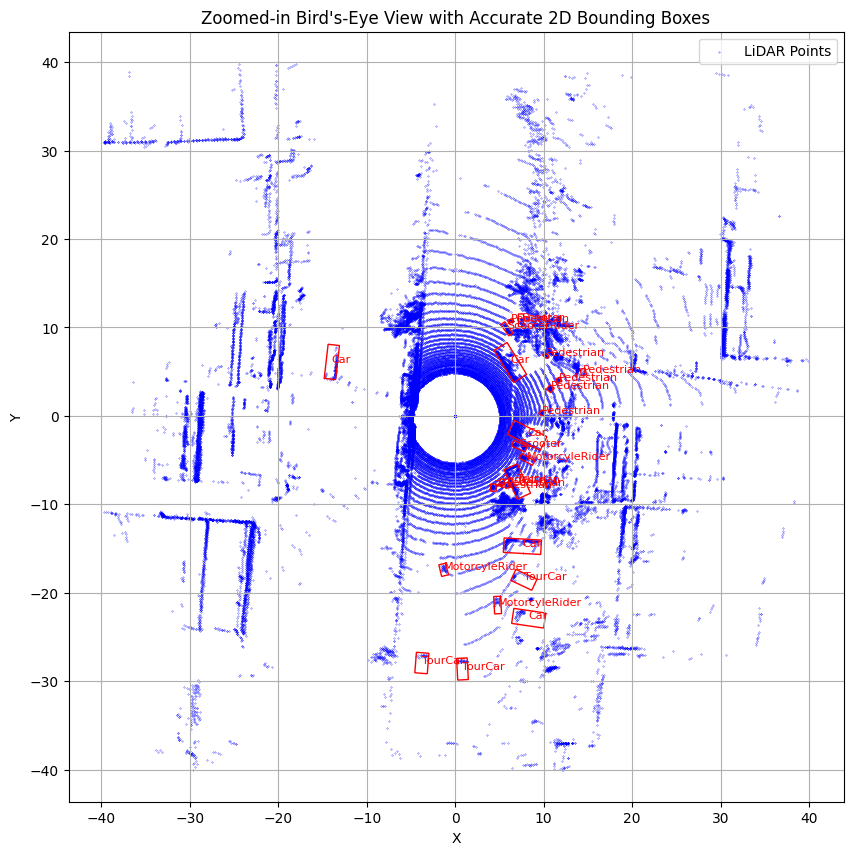

In [3]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib.patches import Rectangle

# Step 1: Read the .pcd file and extract LiDAR data (X, Y coordinates)
pcd = o3d.io.read_point_cloud('IDD_3D/20220118103808_seq_1/lidar/00100.pcd')
lidar_data = np.asarray(pcd.points)
lidar_data_x = lidar_data[:, 0]
lidar_data_y = lidar_data[:, 1]

# Step 2: Read the .json file containing bounding box information
with open('IDD_3D/20220118103808_seq_1/label/00100.json', 'r') as json_file:
    annotations = json.load(json_file)

# Step 3: Define the limits for zooming in
x_min, x_max = -40, 40  # Adjust these limits as needed
y_min, y_max = -40, 40  # Adjust these limits as needed

# Filter LiDAR data based on the limits
in_range_indices = np.where((lidar_data_x >= x_min) & (lidar_data_x <= x_max) & (lidar_data_y >= y_min) & (lidar_data_y <= y_max))
filtered_lidar_data_x = lidar_data_x[in_range_indices]
filtered_lidar_data_y = lidar_data_y[in_range_indices]

# Step 4: Create a bird's-eye view plot
plt.figure(figsize=(10, 10))

# Plot the LiDAR data
plt.scatter(filtered_lidar_data_x, filtered_lidar_data_y, s=0.05, c='b', label='LiDAR Points')

# Plot bounding boxes
for annotation in annotations:
    obj_type = annotation['obj_type']
    psr = annotation['psr']
    x = psr['position']['x']
    y = psr['position']['y']
    scale_x = psr['scale']['x']
    scale_y = psr['scale']['y']
    rotation_z = psr['rotation']['z']

    # Check if the object is within the specified limits
    if x_min <= x <= x_max and y_min <= y <= y_max:
        # Project 3D bounding box to 2D
        half_scale_x = scale_x / 2
        half_scale_y = scale_y / 2
        x1 = x - half_scale_x * np.cos(rotation_z) - half_scale_y * np.sin(rotation_z)
        x2 = x + half_scale_x * np.cos(rotation_z) - half_scale_y * np.sin(rotation_z)
        x3 = x + half_scale_x * np.cos(rotation_z) + half_scale_y * np.sin(rotation_z)
        x4 = x - half_scale_x * np.cos(rotation_z) + half_scale_y * np.sin(rotation_z)
        
        y1 = y - half_scale_x * np.sin(rotation_z) + half_scale_y * np.cos(rotation_z)
        y2 = y + half_scale_x * np.sin(rotation_z) + half_scale_y * np.cos(rotation_z)
        y3 = y + half_scale_x * np.sin(rotation_z) - half_scale_y * np.cos(rotation_z)
        y4 = y - half_scale_x * np.sin(rotation_z) - half_scale_y * np.cos(rotation_z)

        # Create a polygon to represent the 2D bounding box
        bbox = plt.Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)], fill=None, edgecolor='r')
        plt.gca().add_patch(bbox)
        plt.text(x, y, obj_type, fontsize=8, color='r')

# Set the limits for the x and y axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zoomed-in Bird\'s-Eye View with Accurate 2D Bounding Boxes')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is preserved
plt.show()


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


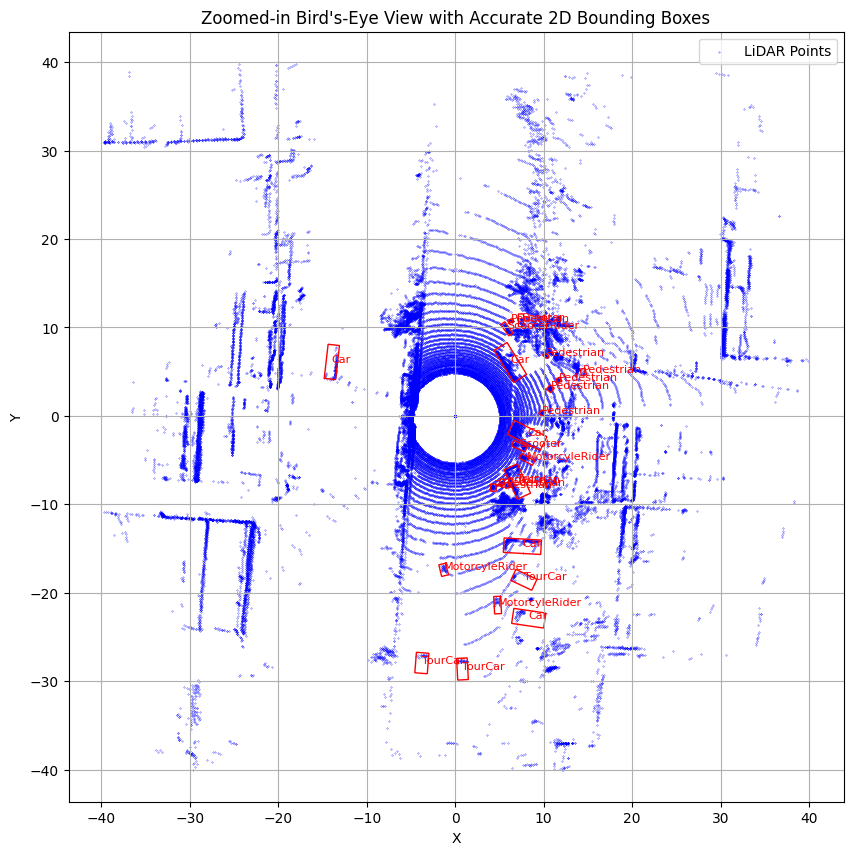

In [2]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib.patches import Rectangle

# Step 1: Read the .pcd file and extract LiDAR data (X, Y coordinates)
pcd = o3d.io.read_point_cloud('IDD_3D/20220118103808_seq_1/lidar/00100.pcd')
lidar_data = np.asarray(pcd.points)
lidar_data_x = lidar_data[:, 0]
lidar_data_y = lidar_data[:, 1]

# Step 2: Read the .json file containing bounding box information
with open('IDD_3D/20220118103808_seq_1/label/00100.json', 'r') as json_file:
    annotations = json.load(json_file)

# Step 3: Define the limits for zooming in
x_min, x_max = -40, 40  # Adjust these limits as needed
y_min, y_max = -40, 40  # Adjust these limits as needed

# Filter LiDAR data based on the limits
in_range_indices = np.where((lidar_data_x >= x_min) & (lidar_data_x <= x_max) & (lidar_data_y >= y_min) & (lidar_data_y <= y_max))
filtered_lidar_data_x = lidar_data_x[in_range_indices]
filtered_lidar_data_y = lidar_data_y[in_range_indices]

# Step 4: Create a bird's-eye view plot
plt.figure(figsize=(10, 10))

# Plot the LiDAR data
plt.scatter(filtered_lidar_data_x, filtered_lidar_data_y, s=0.05, c='b', label='LiDAR Points')

# Plot bounding boxes
for annotation in annotations:
    obj_type = annotation['obj_type']
    psr = annotation['psr']
    x = psr['position']['x']
    y = psr['position']['y']
    scale_x = psr['scale']['x']
    scale_y = psr['scale']['y']
    rotation_z = psr['rotation']['z']

    # Check if the object is within the specified limits
    if x_min <= x <= x_max and y_min <= y <= y_max:
        # Project 3D bounding box to 2D
        half_scale_x = scale_x / 2
        half_scale_y = scale_y / 2
        x1 = x - half_scale_x * np.cos(rotation_z) - half_scale_y * np.sin(rotation_z)
        x2 = x + half_scale_x * np.cos(rotation_z) - half_scale_y * np.sin(rotation_z)
        x3 = x + half_scale_x * np.cos(rotation_z) + half_scale_y * np.sin(rotation_z)
        x4 = x - half_scale_x * np.cos(rotation_z) + half_scale_y * np.sin(rotation_z)
        
        y1 = y - half_scale_x * np.sin(rotation_z) + half_scale_y * np.cos(rotation_z)
        y2 = y + half_scale_x * np.sin(rotation_z) + half_scale_y * np.cos(rotation_z)
        y3 = y + half_scale_x * np.sin(rotation_z) - half_scale_y * np.cos(rotation_z)
        y4 = y - half_scale_x * np.sin(rotation_z) - half_scale_y * np.cos(rotation_z)

        # Create a polygon to represent the 2D bounding box
        bbox = plt.Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)], fill=None, edgecolor='r')
        plt.gca().add_patch(bbox)
        plt.text(x, y, obj_type, fontsize=8, color='r')

# Set the limits for the x and y axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zoomed-in Bird\'s-Eye View with Accurate 2D Bounding Boxes')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is preserved
plt.savefig('birdseye_view.png', dpi=300, bbox_inches='tight')
plt.show()

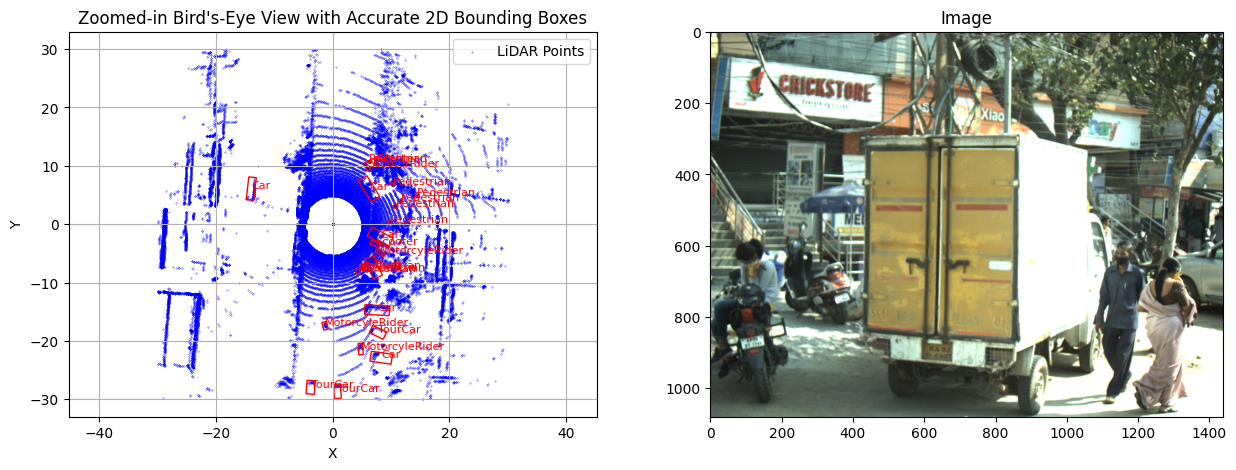

In [2]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Step 1: Read the .pcd file and extract LiDAR data (X, Y coordinates)
pcd = o3d.io.read_point_cloud('IDD_3D/20220118103808_seq_1/lidar/00100.pcd')
lidar_data = np.asarray(pcd.points)
lidar_data_x = lidar_data[:, 0]
lidar_data_y = lidar_data[:, 1]

# Step 2: Read the .json file containing bounding box information
with open('IDD_3D/20220118103808_seq_1/label/00100.json', 'r') as json_file:
    annotations = json.load(json_file)

# Step 3: Define the limits for zooming in
x_min, x_max = -30, 30  # Adjust these limits as needed
y_min, y_max = -30, 30  # Adjust these limits as needed

# Filter LiDAR data based on the limits
in_range_indices = np.where((lidar_data_x >= x_min) & (lidar_data_x <= x_max) & (lidar_data_y >= y_min) & (lidar_data_y <= y_max))
filtered_lidar_data_x = lidar_data_x[in_range_indices]
filtered_lidar_data_y = lidar_data_y[in_range_indices]

# Step 4: Create a bird's-eye view plot
plt.figure(figsize=(15, 5))  # Make the figure wider for side-by-side display

# Create the LiDAR subplot
plt.subplot(121)  # Subplot on the left
plt.scatter(filtered_lidar_data_x, filtered_lidar_data_y, s=0.05, c='b', label='LiDAR Points')

# Plot bounding boxes
for annotation in annotations:
    obj_type = annotation['obj_type']
    psr = annotation['psr']
    x = psr['position']['x']
    y = psr['position']['y']
    scale_x = psr['scale']['x']
    scale_y = psr['scale']['y']
    rotation_z = psr['rotation']['z']

    # Check if the object is within the specified limits
    if x_min <= x <= x_max and y_min <= y <= y_max:
        half_scale_x = scale_x / 2
        half_scale_y = scale_y / 2
        x1 = x - half_scale_x * np.cos(rotation_z) - half_scale_y * np.sin(rotation_z)
        x2 = x + half_scale_x * np.cos(rotation_z) - half_scale_y * np.sin(rotation_z)
        x3 = x + half_scale_x * np.cos(rotation_z) + half_scale_y * np.sin(rotation_z)
        x4 = x - half_scale_x * np.cos(rotation_z) + half_scale_y * np.sin(rotation_z)
        
        y1 = y - half_scale_x * np.sin(rotation_z) + half_scale_y * np.cos(rotation_z)
        y2 = y + half_scale_x * np.sin(rotation_z) + half_scale_y * np.cos(rotation_z)
        y3 = y + half_scale_x * np.sin(rotation_z) - half_scale_y * np.cos(rotation_z)
        y4 = y - half_scale_x * np.sin(rotation_z) - half_scale_y * np.cos(rotation_z)

        bbox = plt.Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)], fill=None, edgecolor='r')
        plt.gca().add_patch(bbox)
        plt.text(x, y, obj_type, fontsize=8, color='r')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zoomed-in Bird\'s-Eye View with Accurate 2D Bounding Boxes')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Load and display the image
image_path = 'IDD_3D/20220118103808_seq_1/camera/cam0/00100.png'
image = plt.imread(image_path)

plt.subplot(122)  # Subplot on the right
plt.imshow(image)
plt.title('Image')

plt.show()


In [9]:
import os
import open3d as o3d
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define the directory where your data is located
data_dir = 'IDD_3D/20220118103808_seq_'

# Define the limits for zooming in
x_min, x_max = -40, 40
y_min, y_max = -40, 40

# Create an empty list to store the LiDAR data and annotations
lidar_data_list = []
annotations_list = []

# Loop through all sequences (seq_0, seq_1, ..., seq_5)
for sequence_number in range(6):  # Assuming you have sequences from 0 to 5
    sequence_dir = os.path.join(data_dir + str(sequence_number))

    # Loop through the LiDAR and JSON files for the current sequence
    for file_number in range(100):
        # Create file numbers for LiDAR and JSON files
        lidar_file_number = sequence_number * 100 + file_number
        json_file_number = sequence_number * 100 + file_number

        # Load LiDAR data from the .pcd file
        lidar_file_path = os.path.join(sequence_dir, 'lidar', f"{lidar_file_number:05d}.pcd")
        if os.path.exists(lidar_file_path):
            pcd = o3d.io.read_point_cloud(lidar_file_path)
            lidar_data = np.asarray(pcd.points)
            lidar_data_list.append(lidar_data)

        # Load bounding box annotations from the .json file
        json_file_path = os.path.join(sequence_dir, 'label', f"{json_file_number:05d}.json")
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as json_file:
                annotations = json.load(json_file)
            annotations_list.append(annotations)

# Now, you can use lidar_data_list and annotations_list to preprocess and train your model.

# Continue with preprocessing, model training, and other steps as needed.


In [ ]:
import os
import open3d as o3d
import numpy as np
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Define the directory where your data is located
data_dir = 'IDD_3D/20220118103808_seq_'
x_min, x_max = -40, 40
y_min, y_max = -40, 40

# Create lists to store LiDAR data and annotations
lidar_data_list = []
annotations_list = []

# Loop through all sequences
for sequence_number in range(6):  # Assuming sequences from 0 to 5
    sequence_dir = os.path.join(data_dir + str(sequence_number))

    for file_number in range(100):
        lidar_file_number = sequence_number * 100 + file_number
        json_file_number = sequence_number * 100 + file_number

        # Load LiDAR data
        lidar_file_path = os.path.join(sequence_dir, 'lidar', f"{lidar_file_number:05d}.pcd")
        if os.path.exists(lidar_file_path):
            pcd = o3d.io.read_point_cloud(lidar_file_path)
            lidar_data = np.asarray(pcd.points)
            lidar_data_list.append(lidar_data)

        # Load bounding box annotations
        json_file_path = os.path.join(sequence_dir, 'label', f"{json_file_number:05d}.json")
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as json_file:
                annotations = json.load(json_file)
            annotations_list.append(annotations)


In [17]:
def preprocess_annotations(annotations):
    target_labels = []
    for sequence_annotations in annotations:
        for annotation in sequence_annotations:
            psr = annotation['psr']
            x = psr['position']['x']
            y = psr['position']['y']
            scale_x = psr['scale']['x']
            scale_y = psr['scale']['y']
            rotation_z = psr['rotation']['z']

            # Extract relevant information and create target label
            target_label = [x, y, scale_x, scale_y]  # Adjust this based on your specific format

            target_labels.append(target_label)
    return target_labels

# Preprocess annotations for training data
y_train = preprocess_annotations(y_train)
y_val = preprocess_annotations(y_val)

# Convert the lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
# Define the CNN model for 2D bounding box detection
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4)  # Output layer with 4 units for bounding box coordinates (x, y, width, height)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

ValueError: Data cardinality is ambiguous:
  x sizes: 420
  y sizes: 8997
Make sure all arrays contain the same number of samples.

In [22]:
X_train.shape

(420, 65536, 3)

In [2]:
import open3d as o3d
import numpy as np
pc_pcd = o3d.io.read_point_cloud("00306.pcd")
# Point Cloud info
print(pc_pcd)
print('Shape of points', np.asarray(pc_pcd.points).shape)
print('Shape of colors', np.asarray(pc_pcd.colors).shape) # no color data
o3d.visualization.draw_geometries([pc_pcd])

PointCloud with 65536 points.
Shape of points (65536, 3)
Shape of colors (0, 3)


In [1]:
import numpy as np
import open3d as o3d

# Load your NumPy array
pc_np = np.load(r'C:\Users\akash\Downloads\IDD MultiModal\supplement\lidar\d1\0000400.npy')

# Check the shape of the loaded array
print('Shape of the Point Cloud:', pc_np.shape)

# Ensure the data type is float64
pc_np = pc_np.astype(np.float64)

# Extract the XYZ coordinates (first 3 columns)
xyz_coordinates = pc_np[:, :3]

# Create a PointCloud object and assign the XYZ coordinates to it
pc = o3d.geometry.PointCloud()
pc.points = o3d.utility.Vector3dVector(xyz_coordinates)

# Now you can work with the Open3D PointCloud object 'pc'
# visualization
o3d.visualization.draw_geometries([pc])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Shape of the Point Cloud: (27793, 5)


In [2]:
import open3d as o3d
import numpy as np
pc_pcd = o3d.io.read_point_cloud("lidar/00350.pcd")
# Point Cloud info
print(pc_pcd)
print('Shape of points', np.asarray(pc_pcd.points).shape)
print('Shape of colors', np.asarray(pc_pcd.colors).shape) # no color data
o3d.visualization.draw_geometries([pc_pcd])

PointCloud with 65536 points.
Shape of points (65536, 3)
Shape of colors (0, 3)
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [4]:
import open3d as o3d
import numpy as np

# List of file paths for the lidar point cloud files
file_paths = ["lidar/00300.pcd", "lidar/00399.pcd"]

# Create an empty combined point cloud
combined_pc = o3d.geometry.PointCloud()

# Iterate through each file and append the point cloud data to the combined point cloud
for file_path in file_paths:
    pc_pcd = o3d.io.read_point_cloud(file_path)
    combined_pc += pc_pcd

# Visualize the combined point cloud
o3d.visualization.draw_geometries([combined_pc])

# Save the combined point cloud to a file if needed
o3d.io.write_point_cloud("combined_lidar.pcd", combined_pc)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] Read PCD failed: unable to open file: lidar/00399.pcd


True

In [3]:
import open3d as o3d
import numpy as np

# Load your lidar point cloud data
lidar_pcd = o3d.io.read_point_cloud("lidar/00306.pcd")

# Segment the point cloud to detect vehicles
# You may need to fine-tune the clustering parameters based on your data
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Error):
    labels = np.array(lidar_pcd.cluster_dbscan(eps=0.5, min_points=10, print_progress=False))

# Create a list to store the detected vehicle point clouds
vehicle_point_clouds = []

# Extract individual point cloud clusters corresponding to vehicles
max_label = labels.max()
for label in range(max_label + 1):
    if label == -1:
        continue  # Ignore noise points (label -1)
    vehicle_indices = np.where(labels == label)[0]
    
    # Convert the NumPy array to a Python list
    vehicle_indices_list = vehicle_indices.tolist()

    vehicle_cluster = lidar_pcd.select_by_index(vehicle_indices_list)
    vehicle_point_clouds.append(vehicle_cluster)

# Visualize the detected vehicle clusters (you can customize the visualization)
o3d.visualization.draw_geometries(vehicle_point_clouds)

# You now have individual point clouds for each detected vehicle.
# These point clouds can be further analyzed or used for tracking and speed estimation.


In [8]:
import open3d as o3d
import numpy as np

# Load your lidar point cloud data
lidar_pcd = o3d.io.read_point_cloud("lidar/00350.pcd")

# Segment the point cloud to detect vehicles
# (Code for segmentation and vehicle detection as shown in a previous response)
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Error):
    labels = np.array(lidar_pcd.cluster_dbscan(eps=0.5, min_points=10, print_progress=False))

# Create a list to store the detected vehicle point clouds
vehicle_point_clouds = []

# Extract individual point cloud clusters corresponding to vehicles
max_label = labels.max()
for label in range(max_label + 1):
    if label == -1:
        continue  # Ignore noise points (label -1)
    vehicle_indices = np.where(labels == label)[0]
    
    # Convert the NumPy array to a Python list
    vehicle_indices_list = vehicle_indices.tolist()

    vehicle_cluster = lidar_pcd.select_by_index(vehicle_indices_list)
    vehicle_point_clouds.append(vehicle_cluster)
# Assuming you have a list of detected vehicle clusters in 'vehicle_point_clouds'
# You can create bounding boxes around each cluster and visualize them

# Initialize a list to store bounding box geometries
bounding_boxes = []

for vehicle_cluster in vehicle_point_clouds:
    # Get the extent (min and max) of the cluster
    min_bound, max_bound = vehicle_cluster.get_min_bound(), vehicle_cluster.get_max_bound()

    # Create a bounding box geometry
    bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound, max_bound)
    bbox.color = (1, 0, 0)
    # Append the bounding box to the list
    bounding_boxes.append(bbox)

# Visualize the point cloud and the bounding boxes
o3d.visualization.draw_geometries(vehicle_point_clouds + bounding_boxes)


In [1]:
!pip install pyntcloud

                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
                                              0.0/346.3 kB ? eta -:--:--
     -                                        10.2/346.3 kB ? eta -:--:--
     ----                                  41.0/346.3 kB 326.8 kB/s eta 0:00:01
     ----                                  41.0/346.3 kB 326.8 kB/s eta 0:00:01
     ----                                  41.0/346.3 kB 326.8 kB/s eta 0:00:01
     -------                               71.7/346.3 kB 302.7 kB/s eta 0:00:01
     -------          

In [4]:
import os
import numpy as np
from pyntcloud import PyntCloud

# Base directory containing your 100 folders
base_directory = 'IDD_3D'

# Ensure the bin directory exists
bin_directory = 'lidarInBIN'

# Iterate through the folders
for folder_number in range(6):
    folder_name = f'20220118103808_seq_{folder_number}'
    folder_path = os.path.join(base_directory, folder_name, 'lidar')

    # Ensure the folder exists
    if not os.path.exists(folder_path):
        continue  # Skip to the next folder if it doesn't exist

    # Create a subdirectory 'lidarInBIN' inside the current folder
    bin_directory_path = os.path.join(folder_path, bin_directory)
    os.makedirs(bin_directory_path, exist_ok=True)

    # List all .pcd files in the folder
    pcd_files = [f for f in os.listdir(folder_path) if f.endswith('.pcd')]

    for pcd_file in pcd_files:
        pcd_path = os.path.join(folder_path, pcd_file)
        bin_file = os.path.splitext(pcd_file)[0] + '.bin'
        bin_path = os.path.join(bin_directory_path, bin_file)

        # Load the .pcd file with pyntcloud
        cloud = PyntCloud.from_file(pcd_path)
        
        # Extract the point data as a NumPy array
        points = cloud.points.to_numpy()
        
        # Save it as .bin
        points.tofile(bin_path)

        print(f'Converted {pcd_file} to {bin_file} in folder {folder_name}')

print("Conversion of .pcd to .bin for the 100 folders completed.")


Converted 00000.pcd to 00000.bin in folder 20220118103808_seq_0
Converted 00001.pcd to 00001.bin in folder 20220118103808_seq_0
Converted 00002.pcd to 00002.bin in folder 20220118103808_seq_0
Converted 00003.pcd to 00003.bin in folder 20220118103808_seq_0
Converted 00004.pcd to 00004.bin in folder 20220118103808_seq_0
Converted 00005.pcd to 00005.bin in folder 20220118103808_seq_0
Converted 00006.pcd to 00006.bin in folder 20220118103808_seq_0
Converted 00007.pcd to 00007.bin in folder 20220118103808_seq_0
Converted 00008.pcd to 00008.bin in folder 20220118103808_seq_0
Converted 00009.pcd to 00009.bin in folder 20220118103808_seq_0
Converted 00010.pcd to 00010.bin in folder 20220118103808_seq_0
Converted 00011.pcd to 00011.bin in folder 20220118103808_seq_0
Converted 00012.pcd to 00012.bin in folder 20220118103808_seq_0
Converted 00013.pcd to 00013.bin in folder 20220118103808_seq_0
Converted 00014.pcd to 00014.bin in folder 20220118103808_seq_0
Converted 00015.pcd to 00015.bin in fold

Converted 00129.pcd to 00129.bin in folder 20220118103808_seq_1
Converted 00130.pcd to 00130.bin in folder 20220118103808_seq_1
Converted 00131.pcd to 00131.bin in folder 20220118103808_seq_1
Converted 00132.pcd to 00132.bin in folder 20220118103808_seq_1
Converted 00133.pcd to 00133.bin in folder 20220118103808_seq_1
Converted 00134.pcd to 00134.bin in folder 20220118103808_seq_1
Converted 00135.pcd to 00135.bin in folder 20220118103808_seq_1
Converted 00136.pcd to 00136.bin in folder 20220118103808_seq_1
Converted 00137.pcd to 00137.bin in folder 20220118103808_seq_1
Converted 00138.pcd to 00138.bin in folder 20220118103808_seq_1
Converted 00139.pcd to 00139.bin in folder 20220118103808_seq_1
Converted 00140.pcd to 00140.bin in folder 20220118103808_seq_1
Converted 00141.pcd to 00141.bin in folder 20220118103808_seq_1
Converted 00142.pcd to 00142.bin in folder 20220118103808_seq_1
Converted 00143.pcd to 00143.bin in folder 20220118103808_seq_1
Converted 00144.pcd to 00144.bin in fold

Converted 00258.pcd to 00258.bin in folder 20220118103808_seq_2
Converted 00259.pcd to 00259.bin in folder 20220118103808_seq_2
Converted 00260.pcd to 00260.bin in folder 20220118103808_seq_2
Converted 00261.pcd to 00261.bin in folder 20220118103808_seq_2
Converted 00262.pcd to 00262.bin in folder 20220118103808_seq_2
Converted 00263.pcd to 00263.bin in folder 20220118103808_seq_2
Converted 00264.pcd to 00264.bin in folder 20220118103808_seq_2
Converted 00265.pcd to 00265.bin in folder 20220118103808_seq_2
Converted 00266.pcd to 00266.bin in folder 20220118103808_seq_2
Converted 00267.pcd to 00267.bin in folder 20220118103808_seq_2
Converted 00268.pcd to 00268.bin in folder 20220118103808_seq_2
Converted 00269.pcd to 00269.bin in folder 20220118103808_seq_2
Converted 00270.pcd to 00270.bin in folder 20220118103808_seq_2
Converted 00271.pcd to 00271.bin in folder 20220118103808_seq_2
Converted 00272.pcd to 00272.bin in folder 20220118103808_seq_2
Converted 00273.pcd to 00273.bin in fold

Converted 00387.pcd to 00387.bin in folder 20220118103808_seq_3
Converted 00388.pcd to 00388.bin in folder 20220118103808_seq_3
Converted 00389.pcd to 00389.bin in folder 20220118103808_seq_3
Converted 00390.pcd to 00390.bin in folder 20220118103808_seq_3
Converted 00391.pcd to 00391.bin in folder 20220118103808_seq_3
Converted 00392.pcd to 00392.bin in folder 20220118103808_seq_3
Converted 00393.pcd to 00393.bin in folder 20220118103808_seq_3
Converted 00394.pcd to 00394.bin in folder 20220118103808_seq_3
Converted 00395.pcd to 00395.bin in folder 20220118103808_seq_3
Converted 00396.pcd to 00396.bin in folder 20220118103808_seq_3
Converted 00397.pcd to 00397.bin in folder 20220118103808_seq_3
Converted 00398.pcd to 00398.bin in folder 20220118103808_seq_3
Converted 00399.pcd to 00399.bin in folder 20220118103808_seq_3
Converted 00400.pcd to 00400.bin in folder 20220118103808_seq_4
Converted 00401.pcd to 00401.bin in folder 20220118103808_seq_4
Converted 00402.pcd to 00402.bin in fold

Converted 00516.pcd to 00516.bin in folder 20220118103808_seq_5
Converted 00517.pcd to 00517.bin in folder 20220118103808_seq_5
Converted 00518.pcd to 00518.bin in folder 20220118103808_seq_5
Converted 00519.pcd to 00519.bin in folder 20220118103808_seq_5
Converted 00520.pcd to 00520.bin in folder 20220118103808_seq_5
Converted 00521.pcd to 00521.bin in folder 20220118103808_seq_5
Converted 00522.pcd to 00522.bin in folder 20220118103808_seq_5
Converted 00523.pcd to 00523.bin in folder 20220118103808_seq_5
Converted 00524.pcd to 00524.bin in folder 20220118103808_seq_5
Converted 00525.pcd to 00525.bin in folder 20220118103808_seq_5
Converted 00526.pcd to 00526.bin in folder 20220118103808_seq_5
Converted 00527.pcd to 00527.bin in folder 20220118103808_seq_5
Converted 00528.pcd to 00528.bin in folder 20220118103808_seq_5
Converted 00529.pcd to 00529.bin in folder 20220118103808_seq_5
Converted 00530.pcd to 00530.bin in folder 20220118103808_seq_5
Converted 00531.pcd to 00531.bin in fold

'4.8.0'

In [2]:
import cv2
import numpy as np

# Load your six photos
img1 = cv2.imread('IDD_3D/20220118103808_seq_1/camera/cam0/00100.png')
img2 = cv2.imread('IDD_3D/20220118103808_seq_1/camera/cam1/00100.png')
img3 = cv2.imread('IDD_3D/20220118103808_seq_1/camera/cam2/00100.png')
img4 = cv2.imread('IDD_3D/20220118103808_seq_1/camera/cam3/00100.png')
img5 = cv2.imread('IDD_3D/20220118103808_seq_1/camera/cam4/00100.png')
img6 = cv2.imread('IDD_3D/20220118103808_seq_1/camera/cam5/00100.png')

# Stitch the photos
stitcher =cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1, img2, img3, img4, img5, img6])

if status == 0:
    cv2.imwrite('panorama.jpg', stitched)
else:
    print("Panorama couldn't be created")


Panorama couldn't be created


In [13]:
import os
import cv2
import numpy as np
import json

# Load the common annotation file for all six camera images
with open('IDD_3D/20220118103808_seq_1/label/00100.json') as f:
    annotations = json.load(f)

# Get the dimensions of the first image (assuming cam0/00000.png)
first_image_path = os.path.join('IDD_3D/20220118103808_seq_1/camera/cam0', '00100.png')
first_image = cv2.imread(first_image_path)
height, width, channels = first_image.shape

# Create a directory for the combined images
combined_dir = 'IDD_3D/20220118103808_seq_1/combined_images'
os.makedirs(combined_dir, exist_ok=True)

# Combine the corresponding images from cam0 to cam5
combined_image = np.zeros((height, width * 6, channels), dtype=np.uint8)

for camera_number in range(6):
    camera_folder = f'IDD_3D/20220118103808_seq_1/camera/cam{camera_number}'
    image_path = os.path.join(camera_folder, '00100.png')
    image = cv2.imread(image_path)

    # Check if the image dimensions match the first image
    if image.shape == (height, width, channels):
        # Append the image horizontally
        combined_image[:, camera_number * width:(camera_number + 1) * width, :] = image
    else:
        print(f"Image dimensions do not match for {camera_folder}/00100.png")

# Save the combined image
combined_image_filename = os.path.join(combined_dir, '00100.png')
cv2.imwrite(combined_image_filename, combined_image)

print("Combining images for 00000.json completed.")


Combining images for 00000.json completed.


In [13]:
!pip install open3d

                                              0.0/62.6 MB ? eta -:--:--
                                              0.0/62.6 MB ? eta -:--:--
                                              0.0/62.6 MB ? eta -:--:--
                                             0.0/62.6 MB 262.6 kB/s eta 0:03:59
                                             0.1/62.6 MB 363.1 kB/s eta 0:02:53
                                             0.1/62.6 MB 547.6 kB/s eta 0:01:55
                                             0.2/62.6 MB 901.1 kB/s eta 0:01:10
                                              0.3/62.6 MB 1.1 MB/s eta 0:00:59
                                              0.4/62.6 MB 1.2 MB/s eta 0:00:54
                                              0.6/62.6 MB 1.6 MB/s eta 0:00:40
                                              1.1/62.6 MB 2.4 MB/s eta 0:00:26
     -                                        1.8/62.6 MB 3.6 MB/s eta 0:00:17
     -                                        2.1/62.6 MB 4.0 MB/s et

In [3]:
import open3d as o3d
import json
import numpy as np

# Load lidar data in .pcd format
lidar_cloud = o3d.io.read_point_cloud('IDD_3D/20220118103808_seq_1/lidar/00100.pcd')

# Load JSON annotations
with open('IDD_3D/20220118103808_seq_1/label/00100.json', 'r') as json_file:
    annotations = json.load(json_file)

# Create an empty list to store all bounding boxes
bounding_boxes = []

# Function to draw bounding boxes
def draw_bounding_boxes(cloud, annotation):
    for obj in annotation:
        psr = obj['psr']
        position = np.array([psr['position']['x'], psr['position']['y'], psr['position']['z']])
        rotation = np.array([[np.cos(psr['rotation']['z']), -np.sin(psr['rotation']['z']), 0],
                             [np.sin(psr['rotation']['z']), np.cos(psr['rotation']['z']), 0],
                             [0, 0, 1]])
        extent = np.array([psr['scale']['x'], psr['scale']['y'], psr['scale']['z']])

        # Create an OrientedBoundingBox
        bbox = o3d.geometry.OrientedBoundingBox(center=position, R=rotation, extent=extent)

        # Add the bounding box to the list
        bounding_boxes.append(bbox)

# Call the draw_bounding_boxes function with your annotations
draw_bounding_boxes(lidar_cloud, annotations)

# Visualize all bounding boxes in a single view
bounding_boxes.append(lidar_cloud)
o3d.visualization.draw_geometries(bounding_boxes)


In [33]:
import open3d as o3d
import numpy as np

def load_and_preprocess_lidar_data(lidar_file_path):
    # Load the .pcd file
    pcd = o3d.io.read_point_cloud(lidar_file_path)

    # Convert the point cloud to a NumPy array
    lidar_data = np.asarray(pcd.points)

    # Convert the NumPy array to a list
    lidar_data = lidar_data.tolist()

    # Preprocess the lidar data (you can apply scaling, normalization, etc. here)
    # For example, normalize the point cloud data to a certain range
    lidar_data = normalize_lidar_data(lidar_data)

    return lidar_data



# Function to normalize lidar data
def normalize_lidar_data(lidar_data):
    # Normalize the lidar data, for example, scale to a specific range

    # Example normalization:
    lidar_data -= np.mean(lidar_data, axis=0)  # Center the data
    lidar_data /= np.max(np.abs(lidar_data))  # Scale to [-1, 1]

    return lidar_data


In [43]:
import os
import json
import numpy as np

# Define your data directory
data_directory = 'IDD_3D/'

# Function to convert NumPy arrays to lists
def convert_to_list(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    raise TypeError("Not serializable")

# Loop through the dataset folders
for dataset_folder in os.listdir(data_directory):
    dataset_path = os.path.join(data_directory, dataset_folder)
    
    # Create a list to store annotations for this dataset
    dataset_annotations = []

    # Construct paths for lidar and annotation folders
    lidar_folder = os.path.join(dataset_path, 'lidar')
    annotation_folder = os.path.join(dataset_path, 'label')
    
    # Create an "annotations" folder if it doesn't exist
    annotations_folder = os.path.join(dataset_path, 'annotations')
    os.makedirs(annotations_folder, exist_ok=True)

    # Loop through the data points in the lidar folder
    for lidar_file in os.listdir(lidar_folder):
        lidar_file_path = os.path.join(lidar_folder, lidar_file)

        # Load and preprocess lidar data
        lidar_data = load_and_preprocess_lidar_data(lidar_file_path)  # Implement this function

        # Construct the path for the corresponding annotation file
        annotation_file_path = os.path.join(annotation_folder, lidar_file.replace('.pcd', '.json'))

        # Load the annotation file
        with open(annotation_file_path, 'r') as json_file:
            annotation = json.load(json_file)

        # Preprocess annotation to match your model's requirements
        preprocessed_annotation = preprocess_annotation(annotation)  # Implement this function

        # Add the lidar data and preprocessed annotation to the dataset_annotations
        dataset_annotations.append({'lidar_data': lidar_data, 'annotation': preprocessed_annotation})

    # Create a JSON file for each dataset folder
    output_json_filename = dataset_folder + '_annotations.json'
    output_json_path = os.path.join(annotations_folder, output_json_filename)

    with open(output_json_path, 'w') as json_file:
        json.dump(dataset_annotations, json_file, default=convert_to_list)

# Your data is now preprocessed and annotated, with JSON files saved in the "annotations" folder for each dataset.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'IDD_3D/20220118103808_seq_0_annotations.json\\annotations'

## Visualized all the files

In [1]:
import os
import json
import open3d as o3d
import numpy as np

# Define the path to your dataset root directory
dataset_root = 'IDD_3D/'

# Function to create an Open3D point cloud from a PCD file
def load_point_cloud(pcd_path):
    pcd = o3d.io.read_point_cloud(pcd_path)
    return pcd

# Function to create bounding boxes from label data
def create_bounding_boxes_from_json(label_path):
    with open(label_path, 'r') as label_json:
        label_data = json.load(label_json)

    bounding_boxes = []
    for item in label_data:
        psr = item['psr']
        position = psr['position']
        rotation = psr['rotation']
        scale = psr['scale']

        # Extract box parameters
        center = np.array([position['x'], position['y'], position['z']])
        dimensions = np.array([scale['x'], scale['y'], scale['z']])
        rotation_angles = np.array([rotation['x'], rotation['y'], rotation['z']])

        # Create an oriented bounding box
        rotation_matrix = o3d.geometry.get_rotation_matrix_from_xyz(rotation_angles)
        box = o3d.geometry.OrientedBoundingBox(center=center, R=rotation_matrix, extent=dimensions)
        bounding_boxes.append(box)

    return bounding_boxes

# Function to visualize point clouds with bounding boxes
def visualize_point_cloud_with_boxes(point_cloud, bounding_boxes):
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(point_cloud)
    for box in bounding_boxes:
        vis.add_geometry(box)
    vis.run()
    vis.destroy_window()

# Loop through the folders
for folder in os.listdir(dataset_root):
    folder_path = os.path.join(dataset_root, folder)
    
    if not os.path.isdir(folder_path):
        continue
    
    # Read lidar data (PCD files)
    lidar_folder = os.path.join(folder_path, 'lidar')
    lidar_files = [f for f in os.listdir(lidar_folder) if f.endswith('.pcd')]
    
    for lidar_file in lidar_files:
        lidar_path = os.path.join(lidar_folder, lidar_file)
        
        # Load lidar point cloud data
        point_cloud = load_point_cloud(lidar_path)
        
        # Read the corresponding JSON label file
        label_folder = os.path.join(folder_path, 'label')
        label_file = lidar_file.replace('.pcd', '.json')
        label_path = os.path.join(label_folder, label_file)
        
        bounding_boxes = create_bounding_boxes_from_json(label_path)
        
        # Visualize the point cloud with bounding boxes
        visualize_point_cloud_with_boxes(point_cloud, bounding_boxes)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
import os
import json
import open3d as o3d
import numpy as np

# Define the path to your dataset root directory
dataset_root = 'IDD_3D/'

# Define a dictionary to hold preprocessed data
preprocessed_data = {
    'point_clouds': [],
    'bounding_boxes': []
}

# Function to create an Open3D point cloud from a PCD file
def load_point_cloud(pcd_path):
    pcd = o3d.io.read_point_cloud(pcd_path)
    return pcd

# Function to create bounding boxes from label data
def create_bounding_boxes_from_json(label_path):
    with open(label_path, 'r') as label_json:
        label_data = json.load(label_json)

    bounding_boxes = []
    for item in label_data:
        psr = item['psr']
        position = psr['position']
        rotation = psr['rotation']
        scale = psr['scale']

        # Extract box parameters
        center = np.array([position['x'], position['y'], position['z']])
        dimensions = np.array([scale['x'], scale['y'], scale['z']])
        rotation_angles = np.array([rotation['x'], rotation['y'], rotation['z']])

        # Create an oriented bounding box
        rotation_matrix = o3d.geometry.get_rotation_matrix_from_xyz(rotation_angles)
        box = o3d.geometry.OrientedBoundingBox(center=center, R=rotation_matrix, extent=dimensions)
        bounding_boxes.append(box)

    return bounding_boxes

# Loop through the folders
for folder in os.listdir(dataset_root):
    folder_path = os.path.join(dataset_root, folder)
    
    if not os.path.isdir(folder_path):
        continue
    
    # Read lidar data (PCD files)
    lidar_folder = os.path.join(folder_path, 'lidar')
    lidar_files = [f for f in os.listdir(lidar_folder) if f.endswith('.pcd')]
    
    for lidar_file in lidar_files:
        lidar_path = os.path.join(lidar_folder, lidar_file)
        
        # Load lidar point cloud data
        point_cloud = load_point_cloud(lidar_path)
        
        # Read the corresponding JSON label file
        label_folder = os.path.join(folder_path, 'label')
        label_file = lidar_file.replace('.pcd', '.json')
        label_path = os.path.join(label_folder, label_file)
        
        bounding_boxes = create_bounding_boxes_from_json(label_path)
        
        # Preprocess the data (e.g., normalize, format for model input)
        # For simplicity, this code just stores the point clouds and bounding boxes in a dictionary
        preprocessed_data['point_clouds'].append(np.asarray(point_cloud.points))
        preprocessed_data['bounding_boxes'].append(bounding_boxes)

# Now you have preprocessed data in preprocessed_data['point_clouds'] and preprocessed_data['bounding_boxes'].
# You can use this data as input to train a 3D object detection model.


In [23]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Define training parameters
batch_size = 1
num_epochs = 50
learning_rate = 0.001

# Split your dataset into training and validation sets
point_clouds = np.array(preprocessed_data['point_clouds'])
bounding_boxes = np.array(preprocessed_data['bounding_boxes'])
point_clouds_train, point_clouds_val, boxes_train, boxes_val = train_test_split(point_clouds, bounding_boxes, test_size=0.2, random_state=42)

# Define your PointNet model
class PointNet(tf.keras.Model):
    def __init__(self, num_classes):
        super(PointNet, self).__init__()
        self.num_classes = num_classes
        self.input_transform_net = self.build_input_transform_net()
        self.feature_transform_net = self.build_feature_transform_net()
        self.pointnet_cls = self.build_pointnet_cls()
        self.fc_layers = self.build_fc_layers()

    # Define Input Transformation Network
    def build_input_transform_net(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv1D(64, 1, activation='relu'))
        model.add(tf.keras.layers.Conv1D(128, 1, activation='relu'))
        model.add(tf.keras.layers.Conv1D(1024, 1, activation='relu'))
        model.add(tf.keras.layers.MaxPooling1D(pool_size=1024))
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dense(9, kernel_initializer='zeros', bias_initializer=keras.initializers.constant([1, 0, 0, 0, 1, 0, 0, 0, 1])))
        model.add(tf.keras.layers.Reshape((3, 3)))
        return model

    # Define Feature Transformation Network
    def build_feature_transform_net(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv1D(64, 1, activation='relu'))
        model.add(tf.keras.layers.Conv1D(128, 1, activation='relu'))
        model.add(tf.keras.layers.Conv1D(1024, 1, activation='relu'))
        model.add(tf.keras.layers.MaxPooling1D(pool_size=1024))
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Dense(9, kernel_initializer='zeros', bias_initializer=keras.initializers.constant([1, 0, 0, 0, 1, 0, 0, 0, 1])))
        model.add(tf.keras.layers.Reshape((3, 3)))
        return model

    # Define PointNet Classification Network
    def build_pointnet_cls(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv1D(64, 1, activation='relu'))
        model.add(tf.keras.layers.Conv1D(128, 1, activation='relu'))
        model.add(tf.keras.layers.Conv1D(1024, 1, activation='relu'))
        model.add(tf.keras.layers.MaxPooling1D(pool_size=1024))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
        return model

    # Define Fully Connected Layers for Regression
    def build_fc_layers(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Dense(7, activation=None))  # Adjust the output shape for your bounding boxes
        return model

    def call(self, inputs):
        x = self.input_transform_net(inputs)
        x = self.feature_transform_net(x)
        x = self.pointnet_cls(x)
        x = self.fc_layers(x)
        return x

# Define your custom dataset class
class CustomDataset(tf.keras.utils.Sequence):
    def __init__(self, point_clouds, bounding_boxes, batch_size):
        self.point_clouds = point_clouds
        self.bounding_boxes = bounding_boxes
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.point_clouds) / self.batch_size))

    def __getitem__(self, idx):
        batch_x = self.point_clouds[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.bounding_boxes[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

# Initialize the model, loss function, and optimizer
num_classes = 10  # Modify based on your dataset
model = PointNet(num_classes)
criterion = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Create data generators for training and validation
train_dataset = CustomDataset(point_clouds_train, boxes_train, batch_size)
val_dataset = CustomDataset(point_clouds_val, boxes_val, batch_size)

# Training loop
for epoch in range(num_epochs):
    for batch_x, batch_y in train_dataset:
        with tf.GradientTape() as tape:
            outputs = model(batch_x)  # Forward pass
            loss = criterion(batch_y, outputs)  # Calculate loss
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Validation
    val_loss = 0
    for batch_x, batch_y in val_dataset:
        val_outputs = model(batch_x)
        val_loss += criterion(batch_y, val_outputs)

    print(f"Epoch {epoch+1}, Training Loss: {loss.numpy()}, Validation Loss: {val_loss.numpy()}")

# Save your trained model
model.save('pointnet_model.h5')


C:\Users\akash\AppData\Local\Temp\ipykernel_13192\1437842743.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bounding_boxes = np.array(preprocessed_data['bounding_boxes'])


ResourceExhaustedError: Exception encountered when calling layer "conv1d_29" "                 f"(type Conv1D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[1,1,65536,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]

Call arguments received by layer "conv1d_29" "                 f"(type Conv1D):
  • inputs=tf.Tensor(shape=(1, 65536, 128), dtype=float32)

In [10]:
import open3d as o3d
import numpy as np

# Load the .pcd file
pcd = o3d.io.read_point_cloud("IDD_3D/20220118103808_seq_1/lidar/00199.pcd")

# Extract the data from the Vector3dVector
points = np.asarray(pcd.points)

# Get the shape of the point cloud in (N, M) format
shape = points.shape

# Print the shape
print("Point Cloud Shape:", shape)


Point Cloud Shape: (65536, 3)


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.models import Model
import os
import json 

# Define PointNet architecture
def pointnet_model(input_shape, num_classes):
    input_points = Input(shape=input_shape, name='input_points')

    # T-Net: Transformation Network
    x = tf.keras.layers.Conv1D(64, 1, activation='relu')(input_points)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv1D(128, 1, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv1D(1024, 1, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = GlobalMaxPooling1D()(x)

    # Fully connected layers
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Dense(3 * 3, weights=[np.zeros((256, 9)), np.eye(3).flatten()])(x)
    transformation_matrix = tf.keras.layers.Reshape((3, 3))(x)

    # Apply transformation to input points
    reshaped_input_points = tf.keras.layers.Lambda(lambda x: tf.matmul(x[0], x[1]))([input_points, transformation_matrix])

    # Feature Transformation Network
    x = tf.keras.layers.Conv1D(64, 1, activation='relu')(reshaped_input_points)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv1D(128, 1, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv1D(1024, 1, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = GlobalMaxPooling1D()(x)

    # Fully connected layers for classification
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_points, outputs=x, name='pointnet_model')
    return model

In [18]:
data_dir = 'IDD_3D/20220118103808_seq_0/'
lidar_dir = os.path.join(data_dir, 'lidar')
label_dir = os.path.join(data_dir, 'label')

point_clouds = []
annotations = []

for frame_number in range(100):
    pcd_file = os.path.join(lidar_dir, f'{frame_number:05d}.pcd')
    pcd = o3d.io.read_point_cloud(pcd_file)
    point_clouds.append(pcd)

    annotation_file = os.path.join(label_dir, f'{frame_number:05d}.json')
    with open(annotation_file, 'r') as f:
        annotation_data = json.load(f)
    annotations.append(annotation_data)

# Create the PointNet model
input_shape = (65536, 3)  # 65,536 points, each with 3 coordinates
num_classes = 10
pointnet = pointnet_model(input_shape, num_classes)

# Compile the model
pointnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
pointnet.summary()

Model: "pointnet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_points (InputLayer)      [(None, 65536, 3)]   0           []                               
                                                                                                  
 conv1d_6 (Conv1D)              (None, 65536, 64)    256         ['input_points[0][0]']           
                                                                                                  
 batch_normalization_10 (BatchN  (None, 65536, 64)   256         ['conv1d_6[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv1d_7 (Conv1D)              (None, 65536, 128)   8320        ['batch_normalizatio

In [51]:
# Convert point clouds and annotations into NumPy arrays
import numpy as np

# Convert point clouds to NumPy arrays
point_clouds_np = [np.asarray(pcd.points) for pcd in point_clouds]

# Convert annotations to NumPy arrays
annotations_np = np.array(annotations)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

# Define the train-validation split ratio (e.g., 80% train, 20% validation)
train_ratio = 0.8

# Split the data
train_point_clouds, val_point_clouds, train_annotations, val_annotations = train_test_split(
    point_clouds_np, annotations_np, test_size=1 - train_ratio, random_state=42
)

# You can preprocess the data further if needed, such as normalizing the point clouds or performing one-hot encoding on annotations.

# Train the PointNet model
batch_size = 32
num_epochs = 10

# Use the training and validation data to fit the model
history = pointnet.fit(
    train_point_clouds,
    train_annotations,
    validation_data=(val_point_clouds, val_annotations),
    batch_size=batch_size,
    epochs=num_epochs,
)

# Evaluate the model
test_loss, test_accuracy = pointnet.evaluate(val_point_clouds, val_annotations)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


C:\Users\akash\AppData\Local\Temp\ipykernel_3068\3933138311.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  annotations_np = np.array(annotations)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [83]:
# Define your class names
class_names = ["MotorcyleRider", "Mototrcycle", "Scooter","ScooterRider","Car","Truck","Bus","Van","TourCar","Pedestrian","BicycleGroup","BicycleRider","Bicycle","Unknown","ConcreteTruck","Crane","Animal"]

# Function to preprocess point clouds
def preprocess_point_clouds(point_clouds):
    preprocessed_data = []

    for pcd in point_clouds:
        # Convert Open3D PointCloud to NumPy array
        points = np.asarray(pcd.points)

        # Downsample the point cloud (e.g., Voxel Grid Downsampling)
        downsampled_points = points[::4]  # Adjust the downsampling factor as needed

        # Remove irrelevant points (e.g., points too far from the sensor)
        max_distance = 50  # Set the maximum distance according to your data
        filtered_points = downsampled_points[
            (downsampled_points[:, 2] < max_distance)
        ]

        # Normalize the point cloud (optional but can be beneficial)
        normalized_points = (filtered_points - filtered_points.mean(0)) / filtered_points.std(0)

        # Keep the point cloud as is, do not pad or truncate
        preprocessed_data.append(normalized_points)

    return np.array(preprocessed_data)

# Function to preprocess labels
def preprocess_labels(annotations, class_names):
    labels = []

    for frame_annotations in annotations:
        frame_labels = []

        for obj_annotation in frame_annotations:
            obj_type = obj_annotation["obj_type"]
            
            # Check if the "obj_type" field is a string
            if isinstance(obj_type, str):
                if obj_type in class_names:
                    class_label = class_names.index(obj_type)
                else:
                    class_label = 13  # Set to 0 if the class is not found
            else:
                class_label = 13  # Set to 0 if "obj_type" is not a string

            frame_labels.append(class_label)

        labels.append(frame_labels)

    return np.array(labels)

# Function to preprocess 3D bounding boxes
def preprocess_bounding_boxes(annotations, max_boxes):
    bounding_boxes = []

    for frame_annotations in annotations:
        frame_bounding_boxes = []
        for obj_annotation in frame_annotations:
            psr = obj_annotation.get("psr", {})
            position = psr.get("position", {})
            rotation = psr.get("rotation", {})
            scale = psr.get("scale", {})

            # Extract 3D bounding box information (modify as needed)
            box_position = [position.get("x", 0.0), position.get("y", 0.0), position.get("z", 0.0)]
            box_rotation = [rotation.get("x", 0.0), rotation.get("y", 0.0), rotation.get("z", 0.0)]
            box_scale = [scale.get("x", 1.0), scale.get("y", 1.0), scale.get("z", 1.0)]

            # Combine position, rotation, and scale to create the bounding box info
            box_info = box_position + box_rotation + box_scale
            frame_bounding_boxes.append(box_info)

        # Pad the frame_bounding_boxes to the max_boxes
        if len(frame_bounding_boxes) < max_boxes:
            padding = max_boxes - len(frame_bounding_boxes)
            frame_bounding_boxes += [[0.0] * 9] * padding

        frame_bounding_boxes = np.array(frame_bounding_boxes)
        bounding_boxes.append(frame_bounding_boxes)

    return np.array(bounding_boxes)

data_dir = 'IDD_3D/20220118103808_seq_0/'
lidar_dir = os.path.join(data_dir, 'lidar')
label_dir = os.path.join(data_dir, 'label')

point_clouds = []
annotations = []

# Load point cloud data and annotations
for frame_number in range(100):
    pcd_file = os.path.join(lidar_dir, f'{frame_number:05d}.pcd')
    pcd = o3d.io.read_point_cloud(pcd_file)
    point_clouds.append(pcd)

    annotation_file = os.path.join(label_dir, f'{frame_number:05d}.json')
    with open(annotation_file, 'r') as f:
        annotation_data = json.load(f)
    annotations.append(annotation_data)

# Preprocess and pad/truncate point clouds and bounding boxes
num_points = 65536
num_boxes = 15  # Adjust this based on your dataset


# Preprocess point clouds
X_data = preprocess_point_clouds(point_clouds)

# Preprocess labels
num_classes = len(class_names)
y_data = preprocess_labels(annotations, class_names)

# Preprocess bounding boxes
bounding_boxes_data = preprocess_bounding_boxes(annotations, num_boxes)

# Split the data into training and validation sets
X_train, X_val = X_data[:80], X_data[80:]
y_train, y_val = y_data[:80], y_data[80:]
bounding_boxes_train, bounding_boxes_val = bounding_boxes_data[:80], bounding_boxes_data[80:]

# Define training hyperparameters
batch_size = 32
num_epochs = 10
def data_generator(X, bounding_boxes, y, batch_size):
    num_samples = len(X)
    num_batches = num_samples // batch_size

    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size

        X_batch = X[start:end]
        bounding_boxes_batch = bounding_boxes[start:end]
        y_batch = y[start:end]

        # Ensure that X_batch and bounding_boxes_batch are NumPy arrays with float32 data type
        X_batch = np.array(X_batch, dtype=np.float32)
        bounding_boxes_batch = np.array(bounding_boxes_batch, dtype=np.float32)

        yield (X_batch, bounding_boxes_batch), y_batch


# Create TensorFlow datasets
train_data_gen = lambda: data_generator(X_train, bounding_boxes_train, y_train, batch_size)
train_dataset = tf.data.Dataset.from_generator(train_data_gen, output_signature=(
    ((tf.TensorSpec(shape=(None, None), dtype=tf.float32), tf.TensorSpec(shape=(None, None), dtype=tf.float32)),
    tf.TensorSpec(shape=(None,), dtype=tf.int64))
))

val_data_gen = lambda: data_generator(X_val, bounding_boxes_val, y_val, batch_size)
val_dataset = tf.data.Dataset.from_generator(val_data_gen, output_signature=(
    ((tf.TensorSpec(shape=(None, None), dtype=tf.float32), tf.TensorSpec(shape=(None, None), dtype=tf.float32)),
    tf.TensorSpec(shape=(None,), dtype=tf.int64))
))


# Training loop
pointnet = pointnet_model(input_shape, num_classes)  # Create the model
pointnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model

for epoch in range(num_epochs):
    for batch in train_dataset:
        (x_batch, bounding_boxes_batch), y_batch = batch
        pointnet.train_on_batch([x_batch, bounding_boxes_batch], y_batch)

# Save the trained model
pointnet.save('pointnet_model.h5')

C:\Users\akash\AppData\Local\Temp\ipykernel_3068\1905437012.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(preprocessed_data)
C:\Users\akash\AppData\Local\Temp\ipykernel_3068\1905437012.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(labels)
C:\Users\akash\AppData\Local\Temp\ipykernel_3068\1905437012.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_3_device_/job:localhost/replica:0/task:0/device:CPU:0}} ValueError: setting an array element with a sequence.
TypeError: only size-1 arrays can be converted to Python scalars


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\Users\akash\.conda\envs\gpu\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\akash\.conda\envs\gpu\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\akash\.conda\envs\gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\akash\AppData\Local\Temp\ipykernel_3068\1905437012.py", line 139, in data_generator
    X_batch = np.array(X_batch, dtype=np.float32)

ValueError: setting an array element with a sequence.


	 [[{{node PyFunc}}]] [Op:IteratorGetNext]

In [ ]:

labels = []

for frame_annotations in annotations:
    frame_labels = []
    for obj_annotation in frame_annotations:
        obj_type = obj_annotation["obj_type"]
        if obj_type in class_names:
            class_label = class_names.index(obj_type)
        else:
            class_label = 0  # Set to 0 if the class is not found
        frame_labels.append(class_label)
    labels.append(frame_labels)

np.array(labels)

[0, 9, 9, 4, 4, 9, 4, 9, 2, 8, 9, 9, 5, 0, 9, 4, 9, 9, 8, 0]

In [23]:
annotations

[[{'obj_id': '6',
   'obj_type': 'MotorcyleRider',
   'psr': {'position': {'x': -3.057812274976829,
     'y': 1.0981443849712764,
     'z': -0.9339649862741547},
    'rotation': {'x': 0, 'y': 0, 'z': -1.5900058853045027},
    'scale': {'x': 2.1692531525826393,
     'y': 0.685537468988914,
     'z': 1.5734273791313171}}},
  {'obj_id': '10',
   'obj_type': 'Pedestrian',
   'psr': {'position': {'x': 1.84588115628019,
     'y': -30.535826311717923,
     'z': -2.0723497355812563},
    'rotation': {'x': 0, 'y': 0, 'z': 1.4244550887236422},
    'scale': {'x': 0.5799049389487767,
     'y': 0.7967264234687141,
     'z': 1.7579153704322048}}},
  {'obj_id': '12',
   'obj_type': 'MotorcyleRider',
   'psr': {'position': {'x': -13.471473220518378,
     'y': -3.3987062569014936,
     'z': -1.5602724786927702},
    'rotation': {'x': 0, 'y': 0, 'z': 1.6032158750579202},
    'scale': {'x': 2.0334712028444457,
     'y': 0.523876359622568,
     'z': 1.3121504298777564}}},
  {'obj_id': '23',
   'obj_type':

In [47]:
import os
import json
import open3d as o3d
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.models import Model


# Function to preprocess point clouds
# Function to preprocess point clouds
def preprocess_point_clouds(point_clouds):
    preprocessed_data = []
    
    for pcd in point_clouds:
        # Convert Open3D PointCloud to NumPy array
        points = np.asarray(pcd.points)

        # Downsample the point cloud (e.g., Voxel Grid Downsampling)
        downsampled_points = points[::4]  # Adjust the downsampling factor as needed

        # Remove irrelevant points (e.g., points too far from the sensor)
        max_distance = 50  # Set the maximum distance according to your data
        filtered_points = downsampled_points[
            (downsampled_points[:, 2] < max_distance)
        ]

        # Normalize the point cloud (optional but can be beneficial)
        normalized_points = (filtered_points - filtered_points.mean(0)) / filtered_points.std(0)

        # Keep the point cloud as is, do not pad or truncate

        preprocessed_data.append(normalized_points)

    return np.array(preprocessed_data)

# Function to preprocess labels
def preprocess_labels(annotations, num_classes):
    labels = []
    
    for annotation in annotations:
        obj_type = annotation["obj_type"]
        class_label = class_names.index(obj_type) if obj_type in class_names else 0  # Set to 0 if the class is not found
        labels.append(class_label)

    # Convert class labels to one-hot encoding
    labels = tf.keras.utils.to_categorical(labels, num_classes)

    return labels


# Data directories
data_dir = 'IDD_3D/20220118103808_seq_0/'
lidar_dir = os.path.join(data_dir, 'lidar')
label_dir = os.path.join(data_dir, 'label')

# Load point cloud data and annotations

point_clouds = [o3d.io.read_point_cloud(os.path.join(lidar_dir, f'{frame:05d}.pcd')) for frame in range(100)]
annotation_files = [os.path.join(label_dir, f'{frame:05d}.json') for frame in range(100)]
annotations = [json.load(open(file_path, 'r')) for file_path in annotation_files]

annotations = [item for sublist in annotations for item in sublist]
# Create the PointNet model
input_shape = (65536, 3)  # 65,536 points, each with 3 coordinates
num_classes = 10
pointnet = pointnet_model(input_shape, num_classes)

# Compile the model
pointnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess and split data (X for point clouds, y for labels)
X_data = preprocess_point_clouds(point_clouds)
y_data = preprocess_labels(annotations, num_classes)

X_train, y_train = X_data[:80], y_data[:80]  # Split the data for training
X_val, y_val = X_data[80:], y_data[80:]    # Split the data for validation

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)

# Define your model and compile it (you've already done this)

# Training loop
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dataset:
        pointnet.train_on_batch(x_batch, y_batch)

    # Evaluate the model on the validation set after each epoch
    val_loss, val_accuracy = pointnet.evaluate(val_dataset, verbose=0)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Save the trained model
pointnet.save('pointnet_model.h5')


C:\Users\akash\AppData\Local\Temp\ipykernel_3068\409535792.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(preprocessed_data)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [50]:
import tensorflow as tf
import numpy as np
import os
import open3d as o3d
import json

# Set the path to your data
data_dir = 'IDD_3D/20220118103808_seq_0/'
lidar_dir = os.path.join(data_dir, 'lidar')
label_dir = os.path.join(data_dir, 'label')

# Load point cloud data and annotations
point_clouds = [o3d.io.read_point_cloud(os.path.join(lidar_dir, f'{frame:05d}.pcd')) for frame in range(100)]
annotations = []

for frame in range(100):
    annotation_file = os.path.join(label_dir, f'{frame:05d}.json')
    with open(annotation_file, 'r') as f:
        annotation_data = json.load(f)
    annotations.append(annotation_data)
# Preprocess and pad/truncate point clouds
num_points = 65536
preprocessed_data = []
for pcd in point_clouds:
    # Convert Open3D PointCloud to NumPy array
    points = np.asarray(pcd.points)

    # Pad or truncate to a fixed number of points
    if points.shape[0] < num_points:
        padding = np.zeros((num_points - points.shape[0], 3))
        preprocessed_data.append(np.vstack((points, padding)))
    else:
        preprocessed_data.append(points[:num_points, :])

X_data = np.array(preprocessed_data)

# Preprocess labels (you've already defined the preprocess_labels function)

# Define training hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Split the data into training and validation sets
X_train, y_train = X_data[:80], y_data[:80]
X_val, y_val = X_data[80:], y_data[80:]

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)

# Create and compile your model (you've already defined pointnet_model and compiled it)

# Training loop
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dataset:
        pointnet.train_on_batch(x_batch, y_batch)

    # Evaluate the model on the validation set after each epoch
    val_loss, val_accuracy = pointnet.evaluate(val_dataset, verbose=0)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Save the trained model
pointnet.save('pointnet_model.h5')


ValueError: Dimensions 20 and 1411 are not compatible

In [42]:
# Define training hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Preprocess and split data (X for point clouds, y for labels)
X_train, y_train = preprocess_data(point_clouds[:80], annotations[:80], num_classes)
X_val, y_val = preprocess_data(point_clouds[80:], annotations[80:], num_classes)


# Define a categorical cross-entropy loss function
loss_function = tf.keras.losses.CategoricalCrossentropy()

# Compile the model with an optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate)
pointnet.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Training loop
for epoch in range(num_epochs):
    for batch in range(0, len(X_train), batch_size):
        x_batch = X_train[batch:batch + batch_size]
        y_batch = y_train[batch:batch + batch_size]
        pointnet.train_on_batch(x_batch, y_batch)

    # Evaluate the model on the validation set after each epoch
    val_loss, val_accuracy = pointnet.evaluate(X_val, y_val, verbose=0)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Save the trained model
pointnet.save('pointnet_model.h5')


TypeError: 'open3d.cpu.pybind.geometry.PointCloud' object is not iterable